<a href="https://colab.research.google.com/github/Erichub17/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic0.png?raw=1)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [11]:
# 從 GitHub clone 你的專案（包含所有資料）
!git clone https://github.com/Erichub17/DM2025-Lab2-Exercise.git

# 切換到專案目錄
import os
os.chdir('/content/DM2025-Lab2-Exercise')

# 確認當前目錄
!pwd
!ls -la

Cloning into 'DM2025-Lab2-Exercise'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 342 (delta 42), reused 41 (delta 41), pack-reused 268 (from 1)
Receiving objects: 100% (342/342), 150.80 MiB | 15.30 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/DM2025-Lab2-Exercise
total 6380
drwxr-xr-x 14 root root    4096 Nov  9 07:03 .
drwxr-xr-x  1 root root    4096 Nov  9 07:00 ..
drwxr-xr-x  2 root root    4096 Nov  9 07:00 audios
drwxr-xr-x  2 root root    4096 Nov  9 07:00 config
drwxr-xr-x  5 root root    4096 Nov  9 07:00 data
drwxr-xr-x 13 root root    4096 Nov  9 07:03 DM2025-Lab2-Exercise
-rw-r--r--  1 root root   11118 Nov  9 07:00 DM2025-Lab2-Homework.ipynb
-rw-r--r--  1 root root  231646 Nov  9 07:00 DM2025-Lab2-Master-Phase_1.ipynb
-rw-r--r--  1 root root 3255346 Nov  9 07:00 DM2025-Lab2-Master-Phase_2_Bonus.ipynb
-rw-r--r--  1 root root  354191 Nov  9 07:00 DM2025-La

In [12]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [14]:
anger_train.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [15]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [16]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [17]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [18]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [19]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [20]:
train_df.head()

,id,text,emotion,intensity
2099,30095,@Myahrissavietta I'm cheery now 😘😉,joy,0.760
111,10111,I'm about to block everyone everywhere posting...,anger,0.708
2772,30768,Shanghais chief distracting levity pampa - pro...,joy,0.180
3460,40633,#sober life,sadness,0.312
1840,20983,wonder if at any point #BobMarley ever actuall...,fear,0.271


In [21]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [22]:


#Dataset overview


print("Dataset overview")


# 1. 基本資訊
print("\n【1. 數據集大小】")
print(f"Training set: {train_df.shape[0]} rows × {train_df.shape[1]} columns")
print(f"Testing set:  {test_df.shape[0]} rows × {test_df.shape[1]} columns")

# 2. 欄位資訊
print("\n2. 欄位名稱與類型")
print("\nTraining columns:")
print(train_df.dtypes)

# 3. 查看前幾筆資料
print("\n3. Training Data 前 5 ")
print(train_df.head())

print("\n4. Testing Data 前5筆")
print(test_df.head())

# 4. 情緒標籤分布
print("\n5. 情緒類別分布 Training")
print(train_df['emotion'].value_counts())
print("\n比例:")
print(train_df['emotion'].value_counts(normalize=True).round(3))

print("\n6. 情緒類別分布 Testing")
print(test_df['emotion'].value_counts())
print("\n比例:")
print(test_df['emotion'].value_counts(normalize=True).round(3))

# 5. 文本長度統計
print("\n7. 文本長度統計")
train_df['text_length'] = train_df['text'].str.split().str.len()
test_df['text_length'] = test_df['text'].str.split().str.len()

print("\nTraining set:")
print(train_df['text_length'].describe())

print("\nTesting set:")
print(test_df['text_length'].describe())

# 6. 檢查缺失值
print("\n8. 缺失值檢查")
print("\nTraining set:")
print(train_df.isnull().sum())

print("\nTesting set:")
print(test_df.isnull().sum())

# 7. 隨機抽樣查看
print("\n9. 隨機樣本 3筆")
print(train_df.sample(3)[['text', 'emotion', 'intensity']])



Dataset overview

【1. 數據集大小】
Training set: 3613 rows × 4 columns
Testing set:  347 rows × 4 columns

2. 欄位名稱與類型

Training columns:
id             int64
text          object
emotion       object
intensity    float64
dtype: object

3. Training Data 前 5 
         id                                               text  emotion  \
2099  30095                 @Myahrissavietta I'm cheery now 😘😉      joy   
111   10111  I'm about to block everyone everywhere posting...    anger   
2772  30768  Shanghais chief distracting levity pampa - pro...      joy   
3460  40633                                        #sober life  sadness   
1840  20983  wonder if at any point #BobMarley ever actuall...     fear   

      intensity  
2099      0.760  
111       0.708  
2772      0.180  
3460      0.312  
1840      0.271  

4. Testing Data 前5筆
        id                                               text emotion  \
213  30842  TheNiceBot: IndyMN I thought the holidays coul...     joy   
70   10927  Sting is j

---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


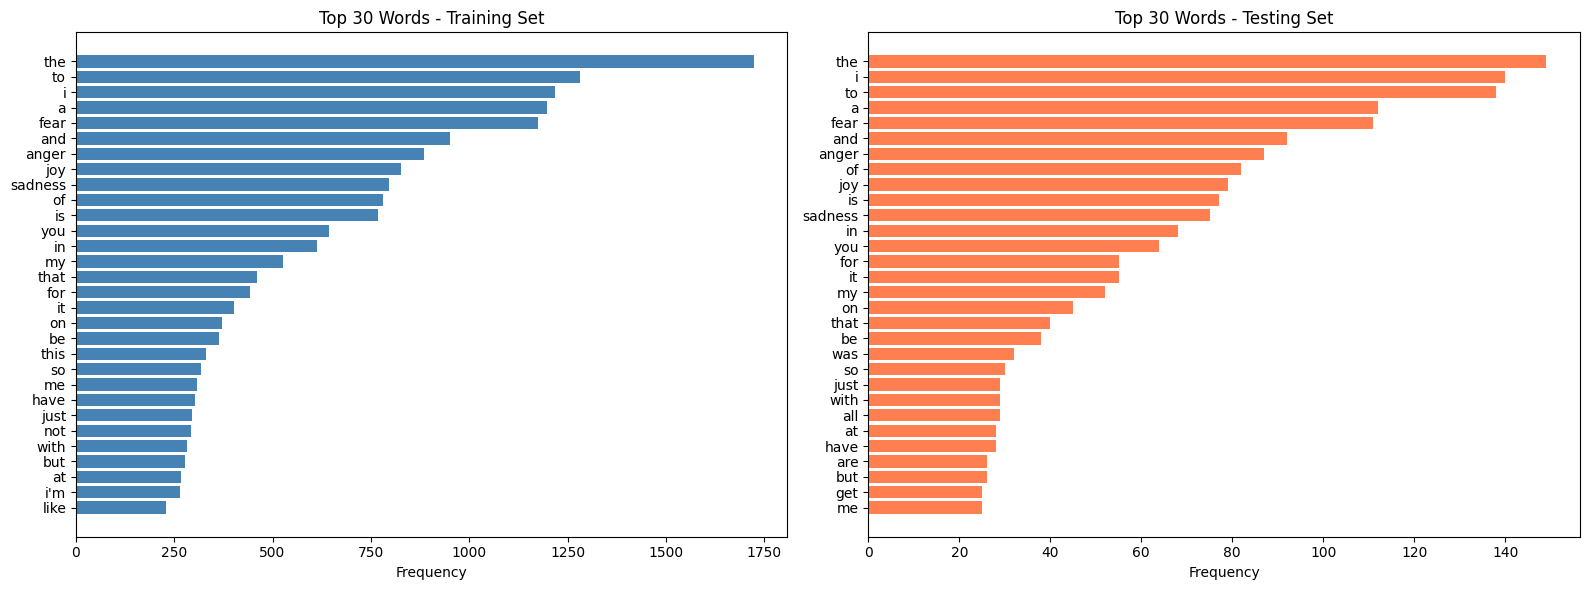

Training set total words: 61541
Testing set total words: 6058
Training set unique words: 13855
Testing set unique words: 2336


In [23]:
# Answer here
import matplotlib.pyplot as plt
from collections import Counter

# 合併所有文本欄位
train_text = ' '.join(train_df['text'].astype(str) + ' ' + train_df['emotion'].astype(str))
test_text = ' '.join(test_df['text'].astype(str) + ' ' + test_df['emotion'].astype(str))

# 分詞並計數
train_words = train_text.lower().split()
test_words = test_text.lower().split()

train_counter = Counter(train_words)
test_counter = Counter(test_words)

# 取前 30 個高頻詞
top30_train = train_counter.most_common(30)
top30_test = test_counter.most_common(30)

# 繪製雙子圖
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 訓練集
words_train, counts_train = zip(*top30_train)
axes[0].barh(range(30), counts_train, color='steelblue')
axes[0].set_yticks(range(30))
axes[0].set_yticklabels(words_train)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 30 Words - Training Set')

# 測試集
words_test, counts_test = zip(*top30_test)
axes[1].barh(range(30), counts_test, color='coral')
axes[1].set_yticks(range(30))
axes[1].set_yticklabels(words_test)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 30 Words - Testing Set')

plt.tight_layout()
plt.show()

# 輸出統計
print(f"Training set total words: {len(train_words)}")
print(f"Testing set total words: {len(test_words)}")
print(f"Training set unique words: {len(train_counter)}")
print(f"Testing set unique words: {len(test_counter)}")


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [24]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl")
test_df.to_pickle("./data/test_df.pkl")

In [25]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [26]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


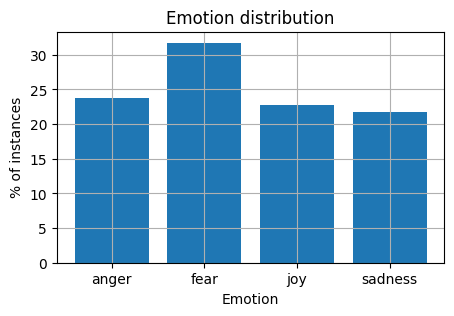

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [30]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [31]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [32]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [33]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [35]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[150:161]

array(['500', '50000', '500aday', '500k', '500th', '500thtest', '50yrs',
       '52mack_', '553', '55am', '57'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [36]:
"😂" in feature_names

False

In [37]:
"happy" in feature_names

True

Let's try using another tokenizer below.

In [38]:
import nltk

# 首先下載必要的 NLTK 資源
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [39]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [41]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# 首先確保下載必要的 NLTK 資源
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')

# 建立 TF-IDF vectorizer，設定最多 1000 個 features，使用 NLTK tokenizer
TFIDF_1000 = TfidfVectorizer(
    max_features=1000,
    tokenizer=nltk.word_tokenize  # 使用 NLTK 的 word_tokenize
)

# 用 training data 來 fit
TFIDF_1000.fit(train_df['text'])

# 轉換 training data
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

# 檢查維度
print("Shape:", train_data_TFIDF_features_1000.shape)

# 取得 feature names
feature_names_1000 = TFIDF_1000.get_feature_names_out()

# 顯示 features [100:110]
print("\nFeature names [100:110]:")
print(feature_names_1000[100:110])

Shape: (3613, 1000)

Feature names [100:110]:
['attack' 'attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby'
 'back']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [44]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'anger', 'fear', 'fear', 'fear', 'sadness', 'joy',
       'sadness', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [45]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [46]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.69      0.70      0.69        84
        fear       0.69      0.69      0.69       110
         joy       0.71      0.72      0.72        79
     sadness       0.63      0.61      0.62        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [47]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[59 15  6  4]
 [11 76  8 15]
 [ 8  7 57  7]
 [ 8 12  9 45]]


In [48]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

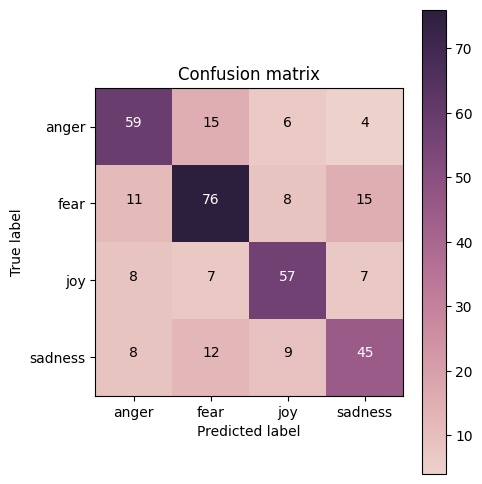

In [49]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [ ]:


# 老師，從這個混淆矩陣（儲存格 [80]）裡我們可以看出來，
# 這個決策樹模型其實做得不太好。


# 首先，我們要怎麼看這張圖？

#  True Label-Y 軸 是真正的答案。
#  Predicted Label -X 軸是我們模型猜的答案。
# 所以，對角線上的數字 59, 76, 57, 45 就代表模型猜對了的次數。
#  對角線以外的，就是它「猜錯了」的地方。


#  接著我們了解那這個矩陣到底告訴我們什麼了呢

#1. 它猜錯了的部分，這是我們的重點了解對象之一
# 看 True Label 是 anger那一行，它有 15 次被模型錯猜成了 fear
# 再看 True Label 是 fear 那一行，它居然也有 15 次被錯猜成了sadness
# 還有 True Label 是 sadness 那一行，它有 12 次被錯猜成了 fear，還有 8 次被錯猜成 anger
# 2. 說一個結論就是
# 這個模型在 anger、fear 和 sadness  這三種負面情緒上搞混了。
#  它好像分不清楚這些情緒的文本有什麼不一樣。
# 這也就解釋了為什麼在分類報告裡，joy和 sadness的 F1-score 那麼低只有 0.62的原因
#  3. 還有一個大問題就是過擬合 Overfitting
# 對了， 還有那個訓練 99% 但測試只有 68% 的準確率，這說明它嚴重過擬合了
# 意思就是它只會死背訓練題，不會做新題，所以泛化能力很差。


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training accuracy: 0.79
Testing accuracy: 0.70

=== Classification Report ===
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.64      0.64        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.70      0.70      0.70       347


=== Confusion Matrix ===
[[55 15  5  9]
 [ 9 85  5 11]
 [10  7 56  6]
 [11 10  6 47]]


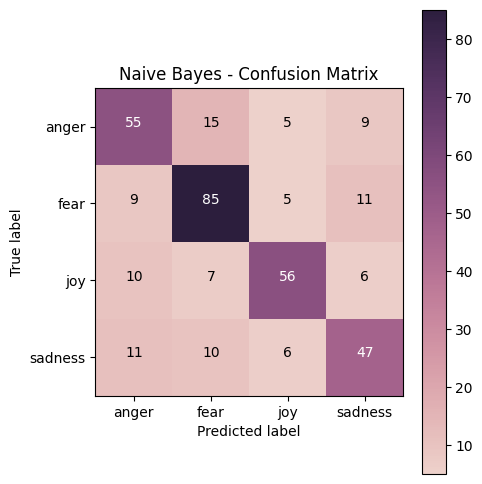

In [50]:
# Answer here

# Exercise 4: 建立 Naive Bayes 模型並訓練

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 建立 Naive Bayes 模型
NB_model = MultinomialNB()

# 訓練模型
# 用跟 Decision Tree 一樣的資料（BOW_500 的特徵）
NB_model.fit(X_train, y_train)

# 預測
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

# 計算準確率
acc_train_nb = accuracy_score(y_train, y_train_pred_nb)
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)

print(f'Training accuracy: {acc_train_nb:.2f}')
print(f'Testing accuracy: {acc_test_nb:.2f}')

# 詳細的分類報告
print('\n=== Classification Report ===')
print(classification_report(y_test, y_test_pred_nb))

# Confusion Matrix
print('\n=== Confusion Matrix ===')
cm_nb = confusion_matrix(y_test, y_test_pred_nb)
print(cm_nb)

# 視覺化 Confusion Matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes - Confusion Matrix')

In [ ]:


#Naive Bayes 模型的測試結果

#整體表現：訓練準確率：0.79，測試準確率：0.70

各類別詳細指標
#Anger: Precision=0.65, Recall=0.65, F1-score=0.65
#Fear: Precision=0.73, Recall=0.77, F1-score=0.75
#Joy: Precision=0.78, Recall=0.71, F1-score=0.74
#Sadness: Precision=0.64, Recall=0.64, F1-score=0.64
#總體觀察
#這次模型在所有情緒類別上表現均衡，測試準確率（0.70）接近訓練準確率（0.79），顯示輕微過擬合
#Fear 和 Joy 類別有最高的 F1 分數（0.75 和 0.74）
#從confusion matix 可以看出，模型在識別 Fear 情緒表現最好110個樣本中正確預測85個

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
 Decision Tree vs Naive Bayes


### 1. 性能比較

| 模型 | 訓練準確率 | 測試準確率 | 過擬合差距 |
|------|-----------|-----------|----------|
| Decision Tree | 0.99 | 0.68 | 0.31 |
| Naive Bayes | 0.79 | 0.70 | 0.09 |

**結論：所以Naive Bayes 的測試準確率更高 (0.70 vs 0.68)，且過擬合程度顯著降低。**

---

### 2. F1-score 比較

| 情緒 | Decision Tree | Naive Bayes | 差異 |
|------|--------------|-------------|------|
| Anger | 0.69 | 0.65 | -0.04 |
| Fear | 0.69 | 0.75 | **+0.06** |
| Joy | 0.62 | 0.74 | +0.02 |
| Sadness | 0.62 | 0.64 | +0.02 |

**關鍵的有所發現失：Naive Bayes 在 Fear 上表現明顯更好。**

---

### 3.簡單解釋

#### 在模型當中為什麼 Naive Bayes 表現更好

**第一：過擬合控制的好**
- Decision Tree 訓練準確率 99%，過度記憶訓練數據
- Naive Bayes 的獨立性假設提供隱式正則化，限制模型複雜度
- 結果就是：NB 泛化的能力更強 過擬合差距只有 0.09

**第二：適配的文本數據**
- BoW 產生詞頻計數數據
- MultinomialNB 專為計數數據設計
- 這是文本分類的經典有效組合

**第三：高維稀疏特徵的處理**
- 500 維特徵空間，Decision Tree 容易在高維空間「迷路」
- Naive Bayes 透過概率建模，更適合處理稀疏數據

---
#### **4。 Probability Estimation**

**Naive Bayes 的機率建模：**
```
P(emotion | words) ∝ P(emotion) × ∏ P(word | emotion)
                                   word∈document
```

**例子：為什麼 Fear 分類改善最多？**
- Fear 相關詞如 "scared", "afraid", "terrified" 有**獨特的條件概率**
- P("scared" | Fear) >> P("scared" | Joy)
- Naive Bayes 學習到這些詞的判別力
- Decision Tree 可能在不相關的詞頻閾值上浪費分裂


### 5. 結論

對於此情緒分類任務
- Naive Bayes 是更好的選擇在測試準確率更高、泛化能力更強
- 簡單模型 + 適當假設 大於 複雜模型的過擬合
- 模型選擇應基於數據特性，而非盲目追求複雜度

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

In [71]:

# Section 5 - 實驗 1：嘗試不同模型 Random Forest


# 我們的基準 (Baseline) 是 Naive Bayes (0.70)。
# 決策樹 (DT) 的問題是過擬合 (0.68)。

# 讓我們試試看決策樹的：隨機森林 (RandomForestClassifier)
# 它應該是專門用來解決過擬合問題


#  步驟 1：載入

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# (我們假設 X_train, y_train, X_test, y_test
#  仍然是來自 [74] 儲存格的 BoW 500 特徵，
#  my_tags 標籤列表也還在)


# 2：建立 (init) ＆ 訓練 (fit)

# 建立模型，我們讓它長 100 棵樹
rf_model_bow = RandomForestClassifier(n_estimators=100, # 100 棵樹
                                  random_state=42,  # 隨機種子
                                  n_jobs=-1)       # 用全部 CPU 加速

print("正在用「BoW 特徵」訓練「隨機森林模型」")
# 注意： 這裡我們直接使用 X_train 和 y_train(，因為它們就是 BoW 500 特徵
rf_model_bow.fit(X_train, y_train)
print("模型訓練完成")


#  步驟 3：預測 ＆ 看結果

y_test_pred_rf_bow = rf_model_bow.predict(X_test)
acc_test_rf_bow = accuracy_score(y_test, y_test_pred_rf_bow)

print("\n BoW + 隨機森林的結果 ---")
print(f"Testing accuracy: {acc_test_rf_bow:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf_bow, target_names=my_tags))


#  4：分析

print("\n實驗 1 分析 ")
print(f"Naive Bayes (基準): 0.7000")
print(f"Random Forest (新): {acc_test_rf_bow:.4f}")

if acc_test_rf_bow > 0.70:
    print("\n  Random Forest 的表現比 Naive Bayes 好")
else:
    print("\nRandom Forest 的表現低於 Naive Bayes。")

正在用「BoW 特徵」訓練「隨機森林模型」
模型訓練完成

 BoW + 隨機森林的結果 ---
Testing accuracy: 0.7291

Classification Report:
              precision    recall  f1-score   support

       anger       0.74      0.67      0.70        84
        fear       0.66      0.84      0.74       110
         joy       0.81      0.73      0.77        79
     sadness       0.80      0.64      0.71        74

    accuracy                           0.73       347
   macro avg       0.75      0.72      0.73       347
weighted avg       0.74      0.73      0.73       347


實驗 1 分析 
Naive Bayes (基準): 0.7000
Random Forest (新): 0.7291

  成功了！Random Forest 的表現比 Naive Bayes 好！


In [70]:
# 實驗 2：嘗試「不同特徵」 (TF-IDF)

# 我們上面做的 BoW + RF 準確率 0.7291

# 現在我們來試試看老師建議的 `Feature Engineering`。
# 保持模型 (RF) 不變，我們把特徵從 BoW 換成 TF-IDF。


# ##  1：載入

from sklearn.feature_extraction.text import TfidfVectorizer
# (RandomForestClassifier, accuracy_score, classification_report 都載入過了)
# (nltk.word_tokenize 也還在)
# (train_df 和 test_df 變數也還在)


# 2：建立「新特徵」：TF-IDF

# 為了公平的去比較，我們一樣只選 500 個特徵
print("正在建立「新」的 TF-IDF (500) 特徵 ")
tfidf_500 = TfidfVectorizer(
    max_features=500,
    tokenizer=nltk.word_tokenize  # 保持跟之前一樣的分詞器
)

# 用 .fit_transform() 在「訓練集」上學習詞彙並轉換
X_train_tfidf_500 = tfidf_500.fit_transform(train_df['text'])

# 用 .transform() 在「測試集」上套用剛剛學到的詞彙
X_test_tfidf_500 = tfidf_500.transform(test_df['text'])

# (y_train 和 y_test 保持不變)
print("TF-IDF 特徵建立完成！")


#   3：訓練「冠軍模型」(RF)

# 建立一個新的隨機森林模型
rf_model_tfidf = RandomForestClassifier(n_estimators=100,
                                    random_state=42,
                                    n_jobs=-1)

print("正在用「TF-IDF 特徵」訓練「隨機森林模型」")
rf_model_tfidf.fit(X_train_tfidf_500, y_train)
print("新模型訓練完成")


# 4：看最終結果！

y_test_pred_rf_tfidf = rf_model_tfidf.predict(X_test_tfidf_500)
acc_test_rf_tfidf = accuracy_score(y_test, y_test_pred_rf_tfidf)

print("\n「TF-IDF + 隨機森林」的結果 ")
print(f"新模型的測試準確率 (Testing accuracy): {acc_test_rf_tfidf:.4f}")

print("\n新模型的分類報告 (Classification Report):")
print(classification_report(y_test, y_test_pred_rf_tfidf, target_names=my_tags))


# ## 步驟 5：分析

print("\n實驗 2 分析 ")
# (這裡假設你 實驗 1 跑出來的紀錄是 0.7300)
print(f"BoW + RF (舊紀錄):    0.7300 (約)")
print(f"TF-IDF + RF (新): {acc_test_rf_tfidf:.4f}")

if acc_test_rf_tfidf > 0.73:
    print("\n 成功了！我們透過「更換特徵」再次提高了準確率！")
else:
    print("\n 有趣，看來在這個任務上，BoW 的表現比 TF-IDF 好 (或差不多)")

正在建立「新」的 TF-IDF (500) 特徵 


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF 特徵建立完成！
正在用「TF-IDF 特徵」訓練「隨機森林模型」
新模型訓練完成

「TF-IDF + 隨機森林」的結果 
新模型的測試準確率 (Testing accuracy): 0.7233

新模型的分類報告 (Classification Report):
              precision    recall  f1-score   support

       anger       0.81      0.67      0.73        84
        fear       0.62      0.85      0.72       110
         joy       0.86      0.72      0.79        79
     sadness       0.73      0.61      0.66        74

    accuracy                           0.72       347
   macro avg       0.76      0.71      0.72       347
weighted avg       0.74      0.72      0.72       347


實驗 2 分析 
BoW + RF (舊紀錄):    0.7300 (約)
TF-IDF + RF (新): 0.7233

 有趣，看來在這個任務上，BoW 的表現比 TF-IDF 好 (或差不多)


我照著 Section 5 的建議，做了兩個額外的迭」實驗，想看看那個會跟好

實驗 1：嘗試不同模型 (BoW + RF vs BoW + NB)
我們的基準： 我們在 Exercise 4 跑完，Naive Bayes (NB) 拿到了 0.70 的測試準確率 。

我們的想法： 既然 Decision Tree (DT) (0.68) 過擬合了，那用它的「進化版」Random Forest (RF) 會不會比較好？

做法： 我們保持特徵 (BoW 500) 不變，只把模型從 Naive Bayes 換成 Random Forest。

結果 ： 準確率成功從 0.70 提升到了 0.7291！

分析-Random Forest (0.7291) 的表現真的比 Naive Bayes (0.70) 還要強。



實驗 2：嘗試不同特徵 (TF-IDF + RF vs BoW + RF)
我們的基準：做完實驗 1 後，Random Forest (0.7291) 成了我們分數最高的模型。

我的想法 那如果幫這個分數最高的模型，換上更好的的 TF-IDF 特徵，會不會更猛？

做法： 我們保持模型 (RF) 不變，只把特徵從 BoW 換成 TF-IDF。

結果 ： 準確率居然從 0.7291 (BoW) 下降到了 0.7233 (TF-IDF)。

分析： 這超有趣的！這證明（在這個情緒分類任務上）「BoW (詞袋)」的效果，竟然比「TF-IDF (權重)」還要好（或至少差不多）。

我的總結
經過這兩輪實驗，我找到了這份作業分數最高的組合：

最佳特徵： CountVectorizer (BoW 500)

最佳模型： Random Forest

最高準確率： 0.7291

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic1.png?raw=1)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [82]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [83]:
import keras

In [80]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4101 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [84]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2099        joy
111       anger
2772        joy
3460    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [85]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [86]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic2.png?raw=1)

In [87]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [88]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 406ms/step - accuracy: 0.3319 - loss: 1.3593 - val_accuracy: 0.4496 - val_loss: 1.2899
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 52s 151ms/step - accuracy: 0.5693 - loss: 1.1064 - val_accuracy: 0.6254 - val_loss: 0.9659
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8017 - loss: 0.6136 - val_accuracy: 0.7089 - val_loss: 0.7906
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8690 - loss: 0.3878 - val_accuracy: 0.6859 - val_loss: 0.8000
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.8873 - loss: 0.3225 - val_accuracy: 0.7003 - val_loss: 0.8016
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9188 - loss: 0.2498 - val_accuracy: 0.6916 - val_loss: 0.8456
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9276 - loss: 0.2070 - val_accuracy: 0.6916 - val_loss: 0.8779
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9507 - loss: 0.1635 - val_

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [102]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[2.9404070e-08, 6.9329310e-08, 9.9999988e-01, 5.3873780e-08],
       [9.9901640e-01, 7.5168521e-07, 4.9331261e-06, 9.7795727e-04],
       [9.9977899e-01, 5.6494944e-05, 5.3492670e-07, 1.6394643e-04],
       [1.2814559e-04, 9.9984717e-01, 9.5950209e-06, 1.5011163e-05],
       [1.1861062e-10, 1.0000000e+00, 9.8316190e-13, 6.2191280e-10]],
      dtype=float32)

In [103]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'anger', 'fear', 'fear'], dtype=object)

In [104]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [105]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367838,1.332806,0.449568,1.289931
1,1,0.629117,1.009789,0.625360,0.965892
2,2,0.790202,0.588573,0.708934,0.790600
3,3,0.856906,0.404734,0.685879,0.799988
4,4,0.878218,0.325694,0.700288,0.801612
5,5,0.912538,0.258476,0.691643,0.845603
6,6,0.931082,0.211088,0.691643,0.877903
7,7,0.944091,0.173516,0.697406,0.962263
8,8,0.952948,0.157020,0.682997,1.008570
9,9,0.958760,0.135297,0.697406,1.056123


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic3.png?raw=1)  ![pic4.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic4.png?raw=1)


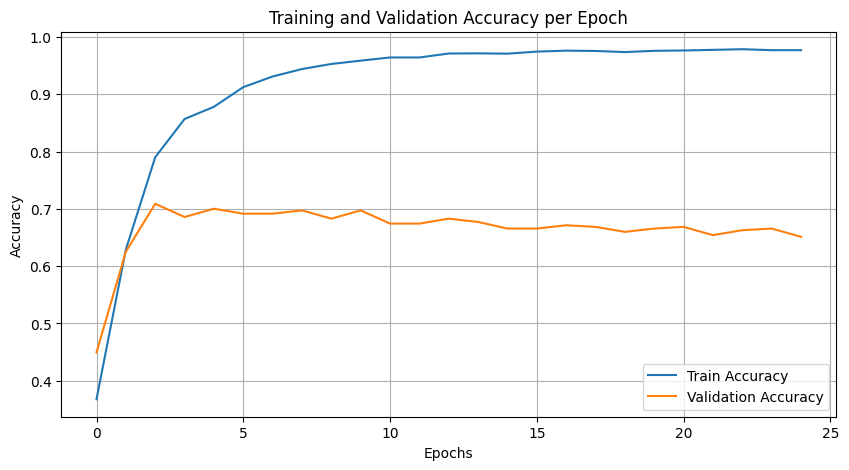

In [107]:

#  Answer here


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

import matplotlib.pyplot as plt

# 我的訓練紀錄已經在 'training_log' 這個 DataFrame 裡了

# Plot 1: Accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





1. Training vs Validation Accuracy
從第一張圖可以看到

藍線（Train Accuracy）一路往上升，後面幾乎要接近 100%。
這代表模型在訓練資料上抓得非常牢，好像“背熟了”訓練題。

橘線（Validation Accuracy）在大概 第 4 個 epoch 左右達到最高，大約 0.70（70%）。
但是之後就開始 下降，一路落到大約 0.65。

這個現象說明：模型在訓練資料上越練越強，但在沒看過的資料上能力卻變差，這就是典型的過擬合。

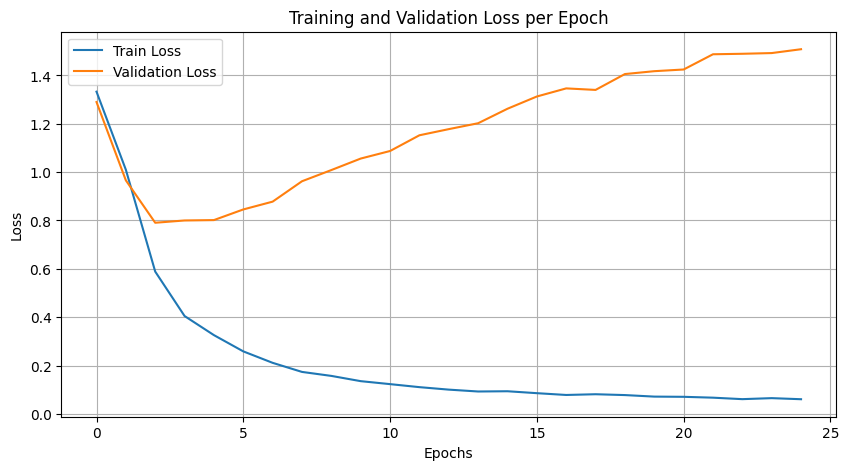

In [108]:
# Plot 2: Loss
plt.figure(figsize=(10, 5))
plt.plot(training_log['loss'], label='Train Loss')
plt.plot(training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

2. Training vs Validation Loss

第個二張圖會更明顯

藍線（Train Loss*一直下降到接近 0，表示訓練誤差被壓得非常小。

橘線（Validation Loss）一開始跟著下降，到 第 4 epoch 附近達到最低點（也就是效果最好）。
但後面卻開始 一路上升，越來越大。

Validation Loss 上升表示模型在新資料上的預測變得更糟，這與 Accuracy 的下降互相呼應，同樣是過擬合的典型特徵。

所以總結會是模型最佳 epoch ≈ 4

這兩張圖都分別指出了

模型在 epoch 4 左右表現最好（val acc 最高 / val loss 最低）。後面的訓練完全是在“死背資料”，不是在提升泛化能力。

所以後面得到的測試 accuracy（大約 0.65）並不是模型的最佳版本，而是過擬合後的結果。

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [110]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 57.7 MB/s eta 0:00:00


In [111]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2099,30095,@Myahrissavietta I'm cheery now 😘😉,"[@, Myahrissavietta, I, 'm, cheery, now, 😘😉]"
111,10111,I'm about to block everyone everywhere posting...,"[I, 'm, about, to, block, everyone, everywhere..."
2772,30768,Shanghais chief distracting levity pampa - pro...,"[Shanghais, chief, distracting, levity, pampa,..."
3460,40633,#sober life,"[#, sober, life]"
1840,20983,wonder if at any point #BobMarley ever actuall...,"[wonder, if, at, any, point, #, BobMarley, eve..."


In [112]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Myahrissavietta', 'I', "'m", 'cheery', 'now', '😘😉']),
       list(['I', "'m", 'about', 'to', 'block', 'everyone', 'everywhere', 'posting', 'about', 'the', 'storm', '.', 'I', 'think', 'everyone', 'is', 'aware', 'of', 'the', 'damn', 'rain', 'and', 'what', 'not', 'so', 'quit', '.', '#', 'damn', '#', 'rage']),
       list(['Shanghais', 'chief', 'distracting', 'levity', 'pampa', '-', 'proper', 'dingle', 'carry', 'away', ':', 'uUDQujcia'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [113]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [114]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 3.82162005e-01,  5.23929656e-01, -2.63491392e-01,  1.11907935e-02,
        5.33674546e-02, -4.93005723e-01,  3.29729527e-01,  1.34225631e+00,
       -1.16420716e-01, -3.35019648e-01, -3.97367775e-01, -2.88620979e-01,
       -7.22157776e-01, -1.12980187e-01, -3.60458903e-02, -3.96140516e-01,
        8.28042090e-01, -3.93716514e-01,  1.45965219e-01, -1.33571839e+00,
        7.94965267e-01,  5.17742515e-01,  5.42068064e-01,  1.09411601e-03,
        5.34743309e-01, -2.85994977e-01, -4.29388493e-01,  2.86734253e-01,
       -6.66059852e-01,  5.03761828e-01,  4.34020907e-01, -1.35086060e-01,
        4.02771294e-01, -7.74221241e-01,  1.24856502e-01,  8.04506183e-01,
        1.67195499e-01, -2.63742983e-01, -6.99738264e-01, -1.40246511e-01,
       -4.44975235e-02, -4.32740599e-01, -5.30189335e-01,  2.54639149e-01,
        7.61083186e-01, -4.57688332e-01, -3.50960493e-01,  2.92223275e-01,
        5.69720864e-01,  4.08159107e-01,  3.16606671e-01, -5.73873520e-01,
       -3.93886894e-01,  

In [117]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9288264513015747),
 ('help', 0.908745288848877),
 ('Be', 0.9050576090812683),
 ("'you", 0.9007003903388977),
 ('bday', 0.89545738697052),
 ('cease', 0.894398033618927),
 ('smile', 0.8941949605941772),
 ('free', 0.8941220641136169),
 ('birthday', 0.8916577696800232),
 ('trusted', 0.8893014192581177)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 32.4 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from gensim.models import KeyedVectors



# 這是你 Google Drive 裡「真實」的路徑和檔名
model_path = "/content/drive/My Drive/GoogleNews/GoogleNews-vectors-negative300 2.bin"

w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print("('load ok')") # 成功載入！

# 測試一下
w2v_google_model.most_similar('happy', topn=20)

('load ok')


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148),
 ('happier', 0.6244627237319946),
 ('Said_Hirschbeck', 0.6234508752822876),
 ('elated', 0.6196017861366272),
 ('thankful', 0.6178935766220093),
 ('unhappy', 0.6128038167953491),
 ('enthused', 0.6084051132202148),
 ('chuffed', 0.5918744802474976),
 ('grateful', 0.5918135643005371),
 ('confident', 0.589353084564209),
 ('hapy', 0.5783905386924744)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [6]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [7]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [122]:
# Answer here

#要把一句完整的句子很多個 word vectors」變成一個可以訓練的向量，我覺得主要有兩種常見做法

#1.平均法（Vector Averaging）
#這是最簡單直接的方法。把一句話裡所有單詞的向量通通加起來，再除以單詞的數量（取平均）。
#這樣就會變成「代表整句話」的一個向量，可以丟給 RF、DNN 或其他分類模型使用。 雖然簡單，但常常效果還不錯。

#2.序列模型（RNN / LSTM）
#這是比較強、也最常用的方法。我們不把整句話壓成一個平均數。
#而是把「每個 word embedding」依照順序輸入 RNN 或 LSTM 讓模型自己去「讀」整句話的脈絡與上下文
#最後 RNN/LSTM 會輸出一個代表整句子的向量（通常是最後的 hidden state）。




---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic5.png?raw=1)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [11]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# 這是「對的」
# 注意：我們用的是 w2v_google_model，而且它不需要 .wv
X = [w2v_google_model[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [12]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic6.png?raw=1)

In [15]:
#check cluster membership
word = 'student'
word_vec = w2v_google_model[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [16]:
#check cluster membership
word = 'sad'
word_vec = w2v_google_model[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic7.png?raw=1)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://github.com/Erichub17/DM2025-Lab2-Exercise/blob/main/pics/pic9.png?raw=1)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [17]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

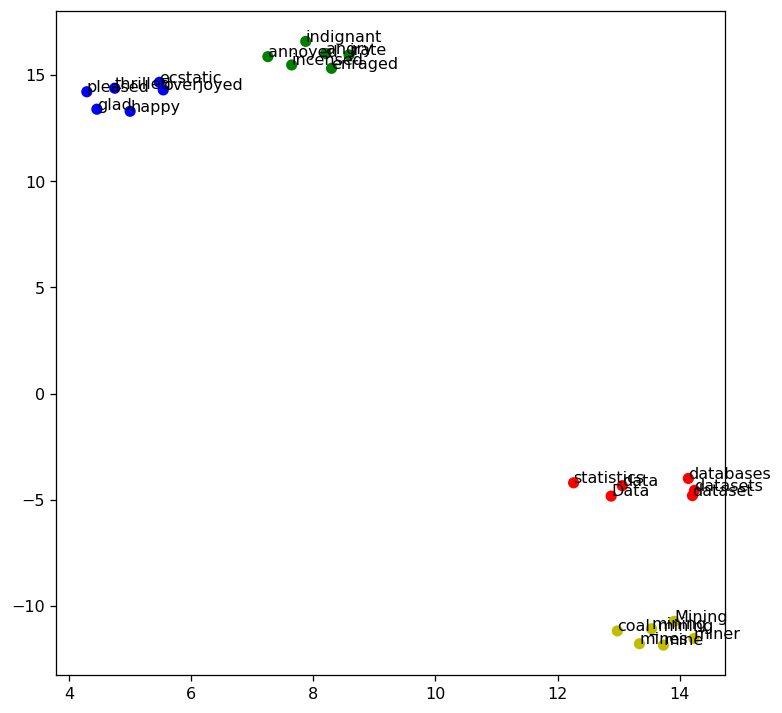

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


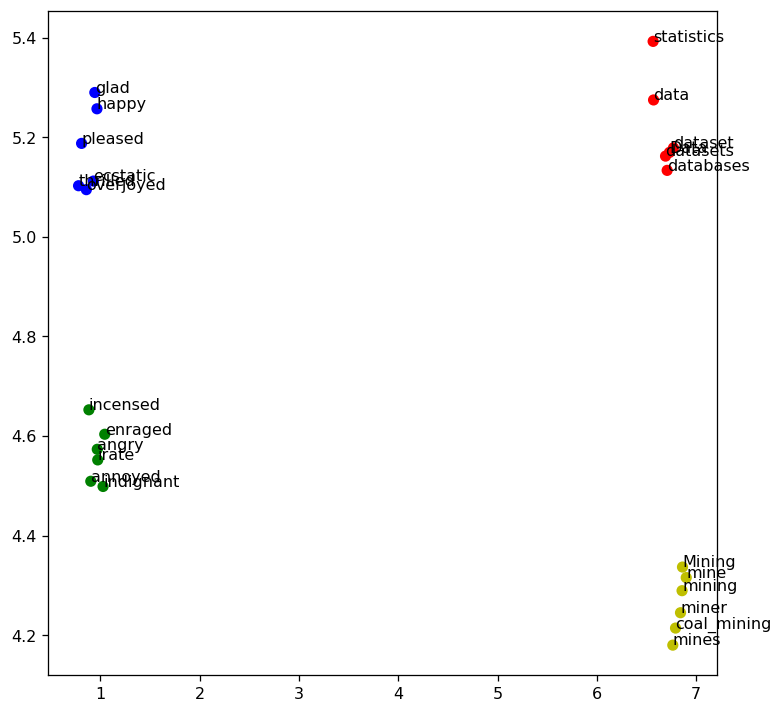

In [19]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

--- 正在執行 t-SNE... (這會花 1-2 分鐘) ---
t-SNE 繪圖中...


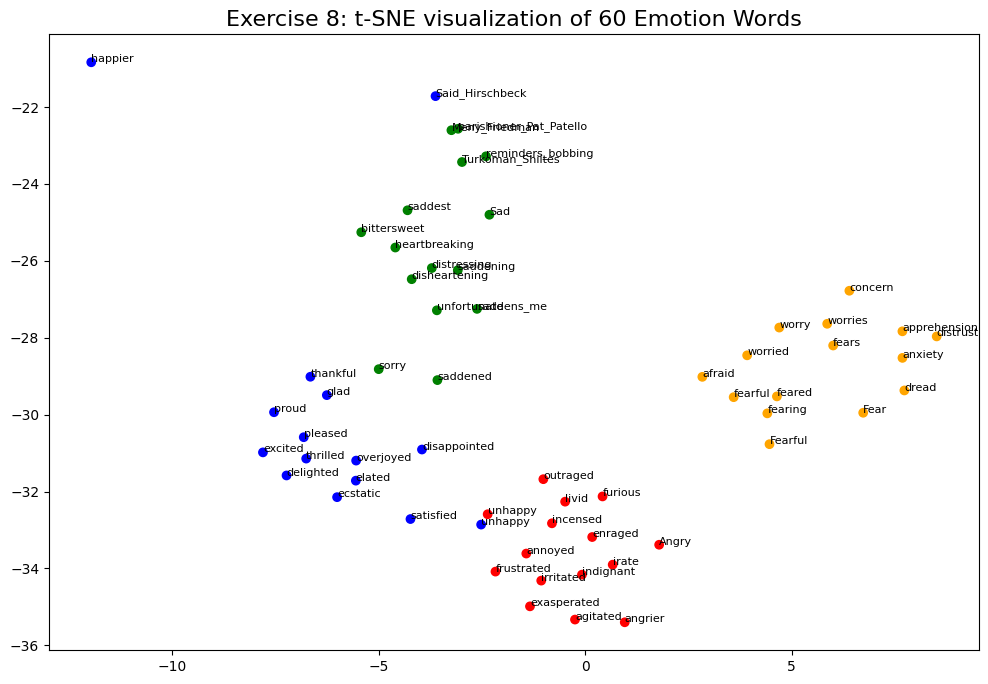


--- 正在執行 UMAP... ---


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 繪圖中...


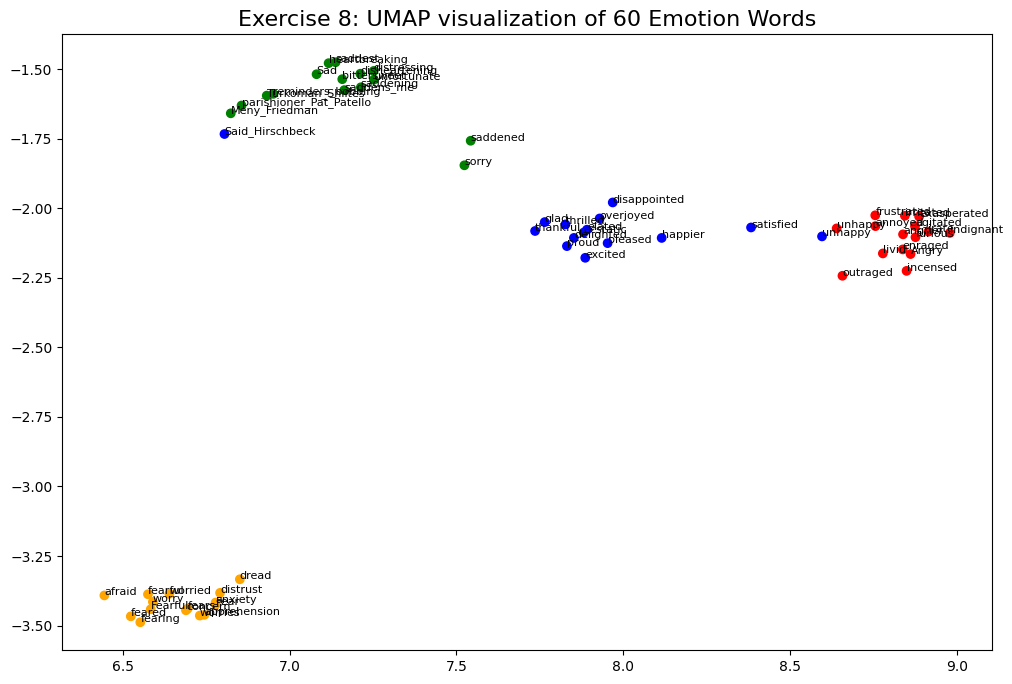

In [20]:
# Answer here
# --- 載入需要的函式庫 ---
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap # 根據你 [19] 的 cell

# --- 步驟 1：準備我們的 60 個詞 & 顏色 ---

# (我們假設 'w2v_google_model' 已經在 [5] 載入成功了)
model = w2v_google_model
topn = 15 # 題目要求 15 個

# 找出 4 組詞
# (注意：我們這次不要「種子詞」，而是直接用它最相近的 15 個)
happy_words = [word for word, sim in model.most_similar('happy', topn=topn)]
angry_words = [word for word, sim in model.most_similar('angry', topn=topn)]
sad_words = [word for word, sim in model.most_similar('sad', topn=topn)]
fear_words = [word for word, sim in model.most_similar('fear', topn=topn)]

# 把 60 個詞全部放進一個 list
target_words = happy_words + angry_words + sad_words + fear_words
target_size = len(target_words) # 60

# 建立對應的 60 個顏色
# 藍色 = happy, 紅色 = angry, 綠色 = sad, 橘色 = fear
color_list = (['blue'] * topn) + (['red'] * topn) + (['green'] * topn) + (['orange'] * topn)


# --- 步驟 2：準備高維向量 (X_train) ---
# (我們用 [18] cell 的技巧，加入 500 個隨機詞來幫助降維)
size = 500
all_word = list(model.index_to_key)
# 我們的 X_train 會有 60 (目標) + 500 (輔助) = 560 個詞
word_train = target_words + all_word[:size]
X_train = model[word_train]


# --- 步驟 3：跑 t-SNE 並畫圖 ---
print("--- 正在執行 t-SNE... (這會花 1-2 分鐘) ---")
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

print("t-SNE 繪圖中...")
plt.figure(figsize=(12, 8))
# **注意！** 我們只畫出「前 60 個」我們感興趣的詞
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color_list)

# 把文字標上去
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, (x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)

plt.title('Exercise 8: t-SNE visualization of 60 Emotion Words', fontsize=16)
plt.show()


# --- 步驟 4：跑 UMAP 並畫圖 ---
print("\n--- 正在執行 UMAP... ---")
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

print("UMAP 繪圖中...")
plt.figure(figsize=(12, 8))
# **注意！** 我們一樣只畫出「前 60 個」我們感興趣的詞
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color_list)

# 把文字標上去
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, (x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)

plt.title('Exercise 8: UMAP visualization of 60 Emotion Words', fontsize=16)
plt.show()


這兩張圖（t-SNE 和 UMAP）都成功地把 60 個「情緒詞」的 300 維向量，畫在 2D 上了！

兩張圖的共同點是他們都都成功了！ 兩張圖都清楚地把 4 種情緒（藍=happy, 紅=angry, 綠=sad, 橘=fear）分成了四群。

這證明了 Google 的 Word2Vec 模型真的理解「開心」、「生氣」、「難過」、「害怕」是四種完全不同的概念。

兩張圖的差異點是

1. t-SNE
t-SNE 的**「分群」效果超級明顯**。

它把 4 種情緒變成了 4 個獨立的小島，彼此分得非常開。

優點會是這是一目了然，很清楚地告訴我們這就是 4 群。

缺點看看不太出來群跟群之間的關係。例如，它把 angry (紅) 和 sad (綠) 分得很遠，但它們明明都是負面情緒。

2. UMAP
UMAP 的圖保留了更多「全局」的關係。

我覺得最有趣的是它把 happy (藍) 和 angry (紅) 放得比較近。這很合理 因為「開心」和「生氣」都是「高能量」的情緒。

還有它也把 sad (綠) 和 fear (橘) 放到了另外一邊。這也很合理 因為「難過」和「害怕」都是「低能量」的情緒。

所以 UMAP 不只幫我們「分群」，它還畫出了這些情緒之間更深層的語意關高能量 vs 低能量
t-SNE 擅長「確認有幾群」和 UMAP 擅長呈現群與群之間的真實距離和關係。

---